In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from posts import most_common_times, plot_posts_intervals, TimePrecision

## What is the most common time in which users publish their posts?
For this problem, we chose to simply count the number of times each post time occurrs in the data set. The times are converted to the same date, so that only the time of the day matters when comparing post times.

For using less granularity in the time, i.e. count posts per minute or hour, the respective values are floored. E.g. `15:10:45` becomes `15:10:00` for minute precision and `15:00:00` for hour precision.

In [3]:
times_s, frequencies_s = most_common_times(TimePrecision.SECOND)
times_m, frequencies_m = most_common_times(TimePrecision.MINUTE)
times_h, frequencies_h = most_common_times(TimePrecision.HOUR)

In [39]:
time_frequency_data = [(times_s, frequencies_s), (times_m, frequencies_m), (times_h, frequencies_h)]

In [31]:
max_freq_data = []

for times, frequency in time_frequency_data:
    max_freq = max(frequency)
    max_time = times[frequency.index(max_freq)]

    max_freq_data.append((max_freq, max_time))

In [47]:
print(frequencies_h)

[195605, 179535, 173125, 165906, 150525, 132792, 120504, 122019, 134047, 148190, 161436, 176487, 195411, 216283, 237895, 252420, 269319, 285648, 298492, 302178, 302051, 292317, 261887, 225928]


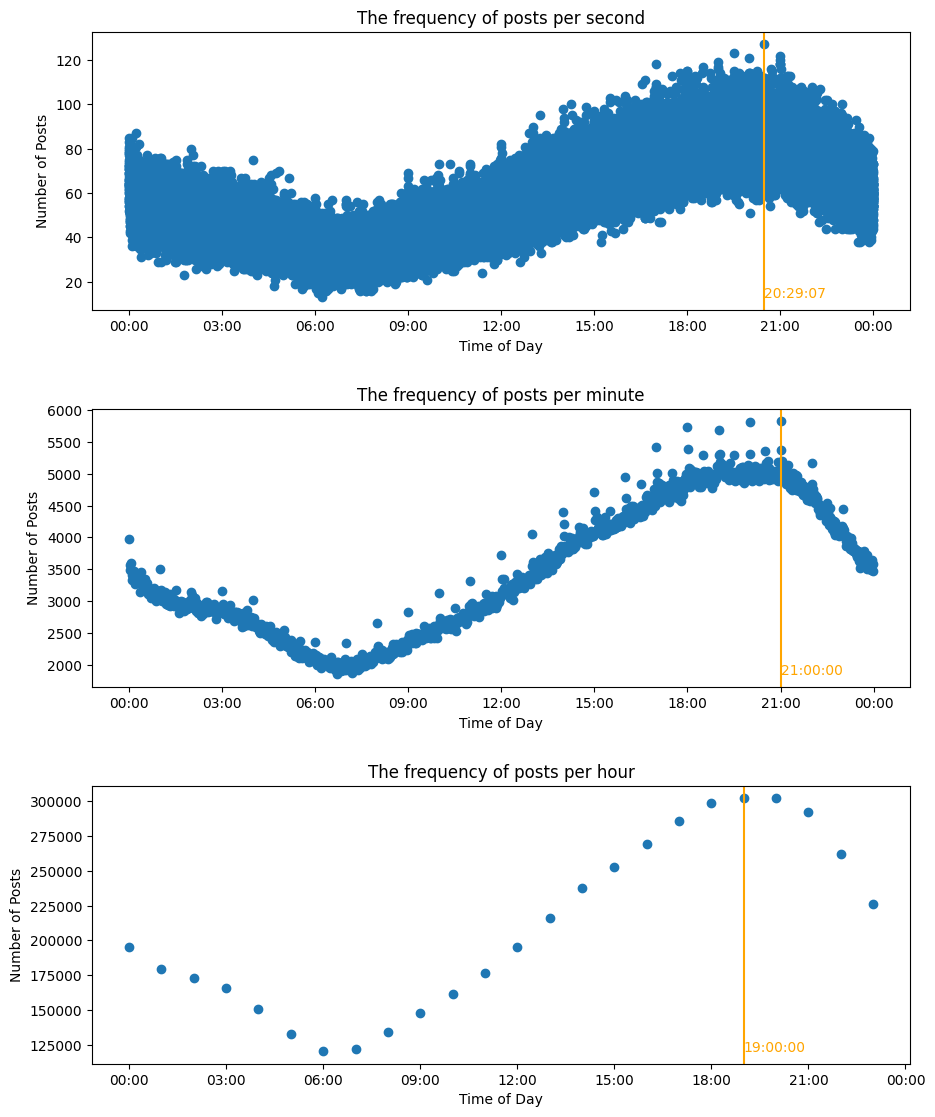

In [46]:
xformatter = mdates.DateFormatter('%H:%M')

fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(10, 12) # setting the size, 3 plots need to fit into 12 inches
fig.tight_layout(pad=5.0) # make sure that there is enough space between subplots

for i, times_frequencies in enumerate(time_frequency_data):
    times, frequencies = times_frequencies
    max_time = max_freq_data[i][1]
    ax[i].plot_date(times, frequencies)
    ax[i].xaxis.set_major_formatter(xformatter)
    ax[i].axvline(x = max_time, color = 'orange')
    ax[i].text(x = max_time, y = min(frequencies), s = str(max_time)[11:], color = 'orange')

    ax[i].set_xlabel('Time of Day', fontsize=10);
    ax[i].set_ylabel('Number of Posts', fontsize=10);
    
ax[0].set_title('The frequency of posts per second');
ax[1].set_title('The frequency of posts per minute');
ax[2].set_title('The frequency of posts per hour');

The plots above shows the frequency of posts with a time resolution of seconds, minutes and hours. Irregardless of time resolution, we can see that most posts are being posted in the evening between 18.00 and midnight. The most common time depends on the time resolution however. Once the resolution gets bigger (minutes and hours), the interval in which posts are falling is bigger as well, and the number of posts per interval goes up.

The table below shows the most common time intervals, depending on the chosen resolution.

| Hour | Minute | Second |
|---|---|---|
|19-20|21:00-21:01|20:29:07|

## Plot the number of posts for time intervals

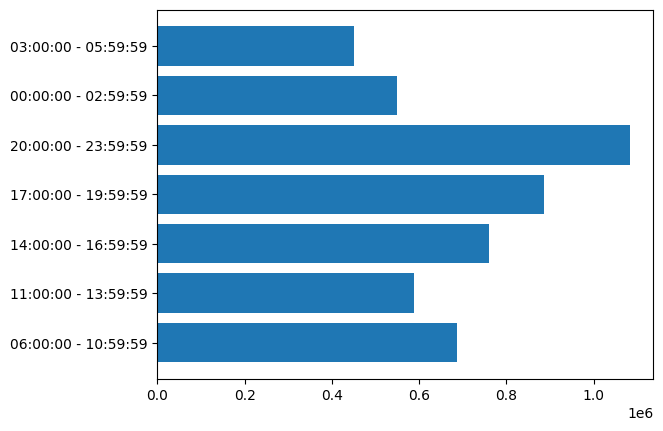

In [33]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]

plot_posts_intervals(intervals);